In [50]:
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('Employees.csv', names=['id', 'name', 'email', 'hz', 'project', 'dep', 'skills'], index_col='id')
data.skills = data.skills.apply(lambda x: json.loads(x.replace('\'', '"')))

data

,name,email,hz,project,dep,skills
id,,,,,,
1,Piper Dingledine,Piper.Dingledine@fakegame.com,7,Fake mobile game,Sales,"[Sales tactic, Storytelling, Relation building]"
2,Dennis Cardenas,Dennis.Cardenas@fakegame.com,7,Fake mobile game,Director,"[Strategic Thinking, Communication, Decision M..."
3,William Mooney,William.Mooney@fakegame.com,7,Fake mobile game,Programmer,"[Perseverance, Self-Motivation, Independence]"
4,Ashley Rifkin,Ashley.Rifkin@fakegame.com,7,Fake mobile game,Sales,"[Sales tactic, Storytelling, Relation building]"
5,Lisa Yruegas,Lisa.Yruegas@fakegame.com,7,Fake mobile game,Director,"[Strategic Thinking, Communication, Decision M..."
...,...,...,...,...,...,...
96,Jan Knock,Jan.Knock@fakegame.com,100,Admin,IT,"[Problem solving, Automation, Daily technologi..."
97,Sandra Bellomo,Sandra.Bellomo@fakegame.com,94,Office management,Office management,"[Budgeting, Events]"
98,David Gieck,David.Gieck@fakegame.com,97,Office management,Office management,"[Budgeting, Events]"


In [99]:
data.dep.unique()

array(['Sales', 'Director', 'Programmer', 'IT', 'Manager', 'CTO', 'HR',
       'DevRel', 'Office management', 'CEO'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

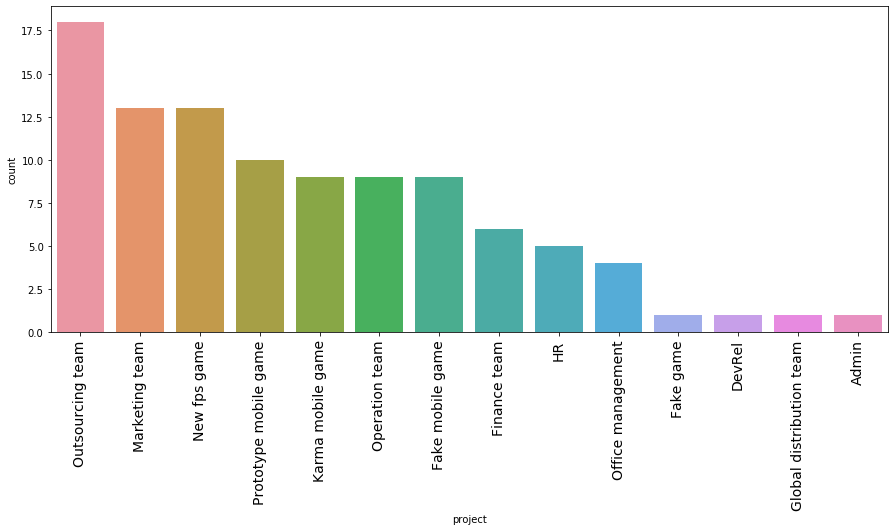

In [64]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='project', order=data['project'].value_counts().index)
plt.xticks(rotation=90, fontsize=14)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

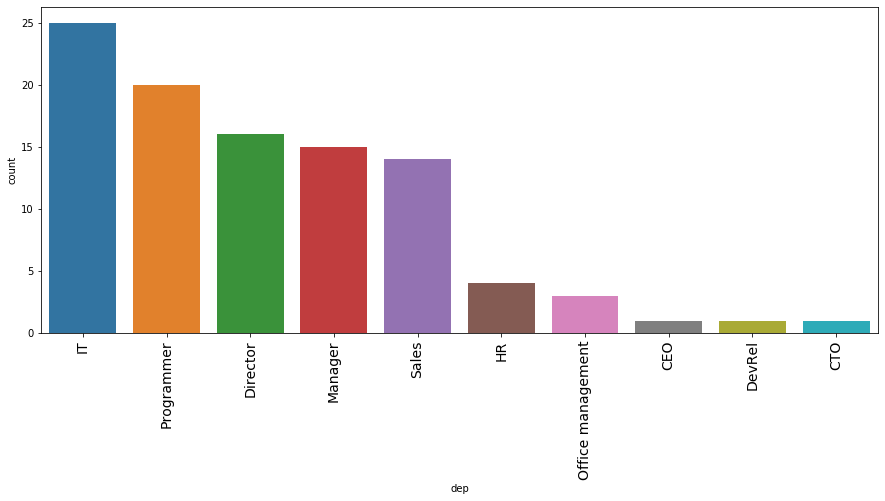

In [65]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x='dep', order=data['dep'].value_counts().index)
plt.xticks(rotation=90, fontsize=14)

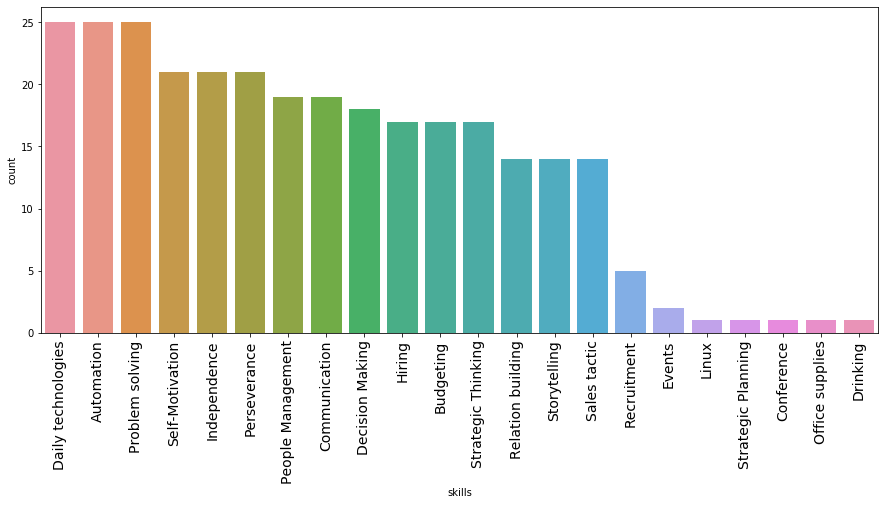

In [86]:
skills = set(sum([x for x in data.skills], []))
skills = {s:0 for s in skills}

for x in data.skills:
    for s in skills.keys():
        if s in x:
            skills[s] += 1

skills_df = pd.DataFrame({'skills': list(skills.keys()), 'count': list(skills.values())})
skills_df = skills_df.sort_values('count', ascending=False).reset_index()


plt.figure(figsize=(15, 6))
sns.barplot(data=skills_df, x='skills', y='count')
plt.xticks(rotation=90, fontsize=14)
plt.show()